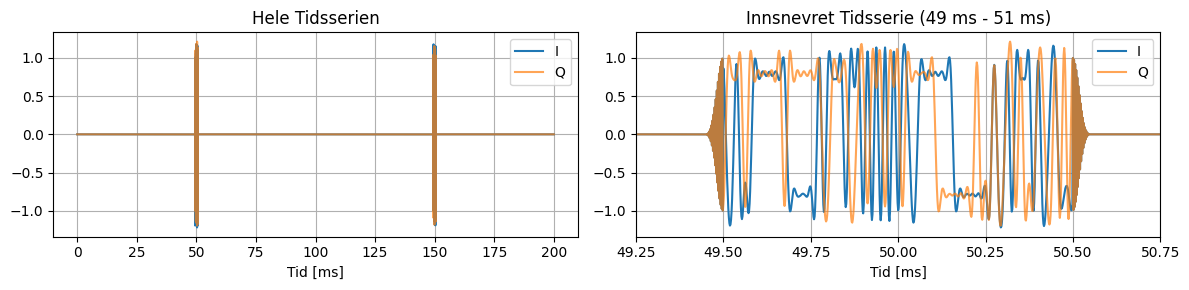

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Filnavn og lesing av data
filnavn = 'SimData/tidsserie.bin'
data = np.fromfile(filnavn, dtype=np.complex64)

# Definer samplingsfrekvens og tidsakse (ms)
samp_rate = 640e3
t = np.arange(len(data)) / samp_rate * 1000  # Tidsakse, ms

# Filtrering for den innsnevrede tidsserien mellom 49 ms og 51 ms
start_time = 49.25  # Starttidspunkt for tidsvindu
end_time = 50.75    # Sluttidspunkt for tidsvindu
start_idx = np.searchsorted(t, start_time)  # Indeks for starttid
end_idx = np.searchsorted(t, end_time)      # Indeks for sluttid

# Lag subplots: 3 subplots (1 stor + 2 mindre)
fig, axs = plt.subplots(1, 2, figsize=(12, 3))  # Tre subplots, vertikal layout

# Plot hele tidsserien på første subplot (stor)
axs[0].plot(t, np.real(data), label='I', color='tab:blue')
axs[0].plot(t, np.imag(data), label='Q', color='tab:orange', alpha=0.7)
axs[0].set_title('Hele Tidsserien')
axs[0].set_xlabel('Tid [ms]')
axs[0].legend()
axs[0].grid(True)

# Plot innsnevret tidsserie for I (real del) på andre subplot
axs[1].plot(t[start_idx:end_idx], np.real(data[start_idx:end_idx]), label='I', color='tab:blue')
axs[1].plot(t[start_idx:end_idx], np.imag(data[start_idx:end_idx]), label='Q', color='tab:orange', alpha=0.7)
axs[1].set_title('Innsnevret Tidsserie (49 ms - 51 ms)')
axs[1].set_xlabel('Tid [ms]')
axs[1].legend()
axs[1].set_xlim(start_time, end_time)  # Sett x-aksen til tidsvinduet
axs[1].set_xticks(np.arange(start_time, end_time+0.001, 0.25))  # Sett x-aksen til 0.5 ms intervaller
axs[1].grid(True)  # Legg til rutenett for bedre lesbarhet

# Juster layout for bedre visning
plt.savefig('Figurer/tx_tidsserie.pdf',format="pdf", bbox_inches='tight')
plt.tight_layout()
plt.show()
